In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
from pathlib import Path
import cartopy.crs as ccrs
from jonnie import plot_iso, plot_model
import numpy as np

In [3]:
DATA=Path('/Users/jonniebarnsley/data/karthaus24/group11-project')
iso = 'isochrones.nc'
variable = DATA / 'ncfiles/variable-seasonality.nc'
fixed = DATA / 'ncfiles/fixed-seasonality.nc'

In [4]:
# take a look at isochrone data
iso_data = xr.open_dataset(iso)
iso_data

<xarray.Dataset>
Dimensions:    (x: 1550, y: 1550)
Coordinates:
  * x          (x) float32 -1.428e+06 -1.426e+06 ... 1.668e+06 1.67e+06
  * y          (y) float32 -3.571e+06 -3.569e+06 ... -4.75e+05 -4.73e+05
Data variables:
    isochrone  (y, x) float32 ...
    lon        (y, x) float32 ...
    lat        (y, x) float32 ...

In [5]:
# and at model data
model = xr.open_dataset(variable)
model

<xarray.Dataset>
Dimensions:      (x1: 330, y1: 270, x0: 330, y0: 270, z: 12, time: 240)
Coordinates:
  * x1           (x1) float32 -75.9 -75.7 -75.5 -75.3 ... -10.5 -10.3 -10.1
  * y1           (y1) float32 58.05 58.15 58.25 58.35 ... 84.75 84.85 84.95
  * x0           (x0) float32 -75.8 -75.6 -75.4 -75.2 ... -10.4 -10.2 -10.0
  * y0           (y0) float32 58.1 58.2 58.3 58.4 58.5 ... 84.7 84.8 84.9 85.0
  * z            (z) float32 0.0 0.025 0.1 0.225 0.375 ... 0.925 0.965 0.99 1.0
  * time         (time) float32 -2e+04 -1.99e+04 -1.98e+04 ... -200.0 -100.0 0.0
Data variables: (12/53)
    vershis      (time) float32 ...
    sealev       (time) float32 ...
    toti         (time) float32 ...
    totig        (time) float32 ...
    totif        (time) float32 ...
    tota         (time) float32 ...
    ...           ...
    ubot         (time, y1, x0) float32 ...
    ua           (time, y1, x0) float32 ...
    vtop         (time, y0, x1) float32 ...
    vbot         (time, y0, x1) float32 ...
    va           (time, y0, x1) float32 ...
    msector      (time, y1, x1) float32 ...
Attributes:
    title:                     ice sheet-shelf
    horiz_grid:                regular
    projection:                latlon
    history:                   Thu May 10 16:46:10 2018: ncrcat -l . keisling...
    NCO:                       "4.5.3"
    nco_openmp_thread_number:  1

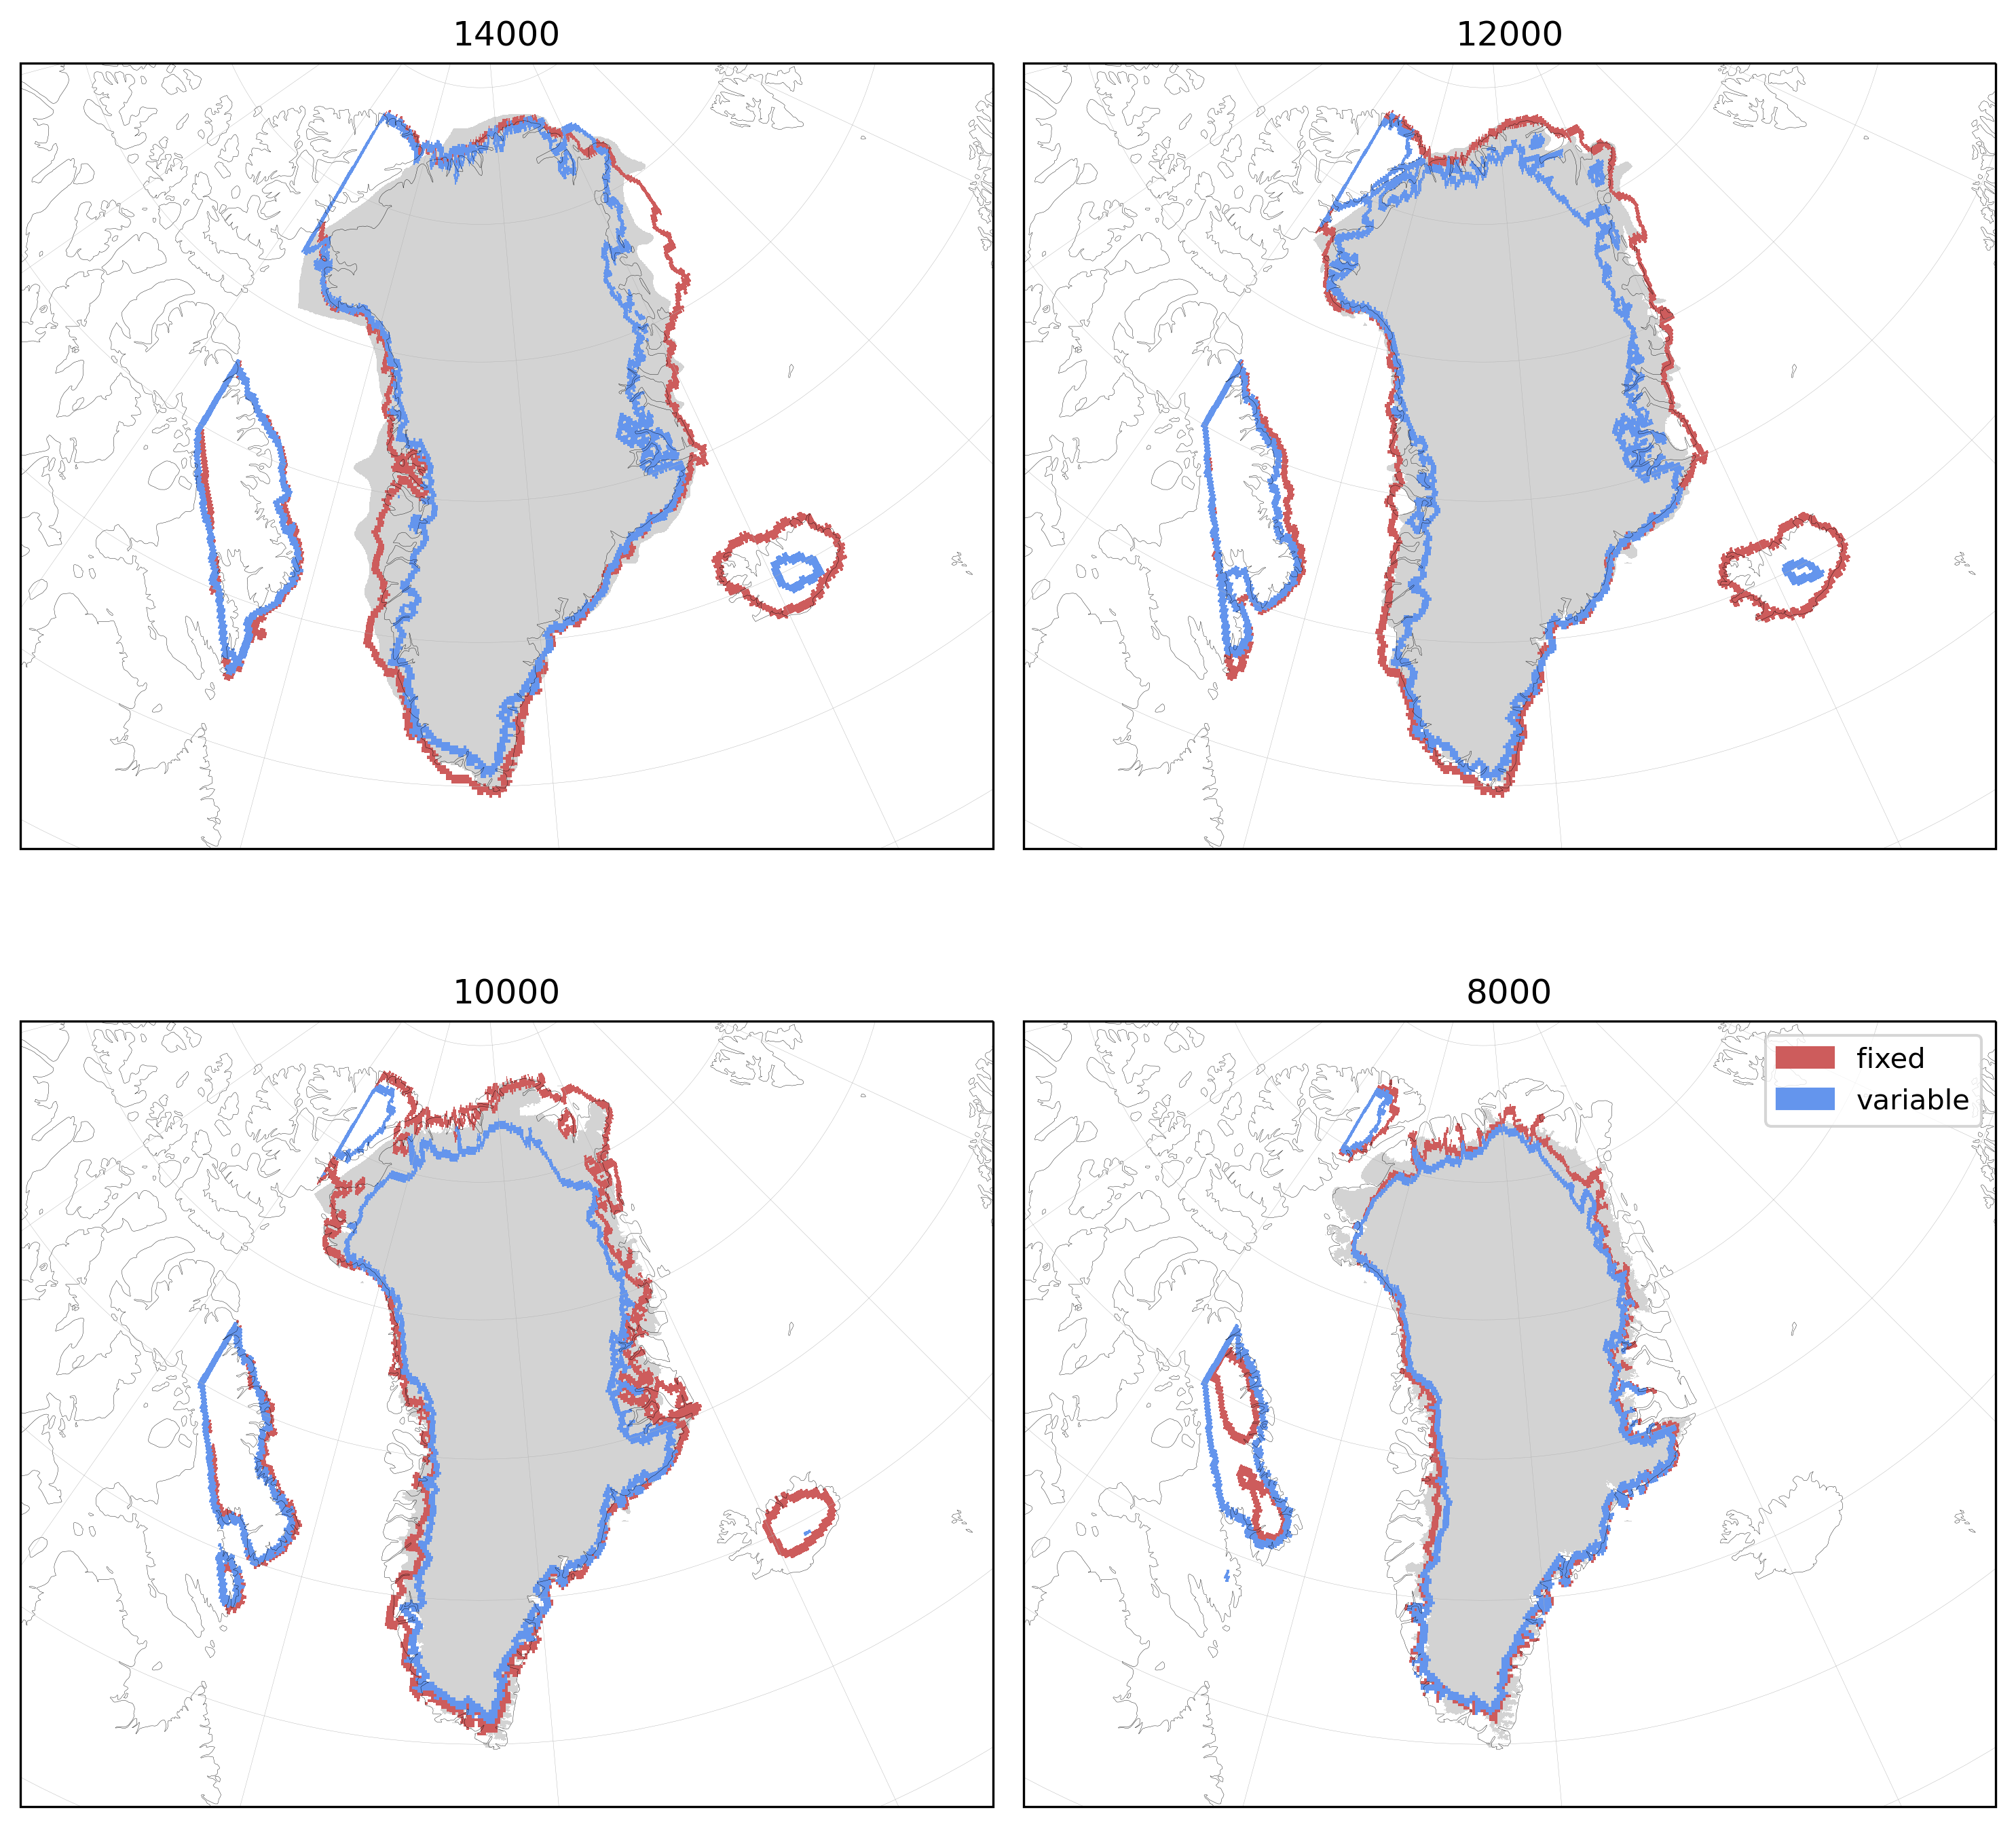

In [8]:
fig, axes = plt.subplots(
    nrows=2, 
    ncols=2, 
    subplot_kw={'projection': ccrs.NorthPolarStereo(central_longitude=315)},
    #dpi=250
    figsize=(10, 10),
    dpi=300
    )

times = [14000, 12000, 10000, 8000]

for ax, time in zip(axes.flatten(), times):
    plot_iso(ax, iso, time)
    plot_model(ax, fixed, time, color='indianred')
    plot_model(ax, variable, time, color='cornflowerblue')
    ax.set_title(time)
    ax.coastlines('50m', lw=0.1)
    ax.gridlines(lw=0.1)

red_patch = mpatches.Patch(color='indianred', label='fixed')
blue_patch = mpatches.Patch(color='cornflowerblue', label='variable')

plt.legend(handles=[red_patch, blue_patch])

fig.tight_layout()
plt.savefig('plots/comparison.png', format='png')